In [56]:
using DrWatson

@quickactivate "GRNEvoContingency"

projectname()

"GRNEvoContingency"

In [151]:
include(srcdir("TissueModel_ND.jl"))

include(srcdir("Evolution.jl"))
# include(srcdir("FitnessFunctions.jl"))

include(srcdir("NetworkTopologies.jl"))
include(srcdir("Utility.jl"))

using Plots
using CairoMakie

Define start network and default model parameters:

In [152]:
# start_topology = w_frozen_osc

# start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)) .* 10 .* rand(Ng,Ng+1) .* start_topology

# start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)) .* 10 .* rand(Ng,Ng+1)

grn_parameters = DefaultGRNParameters();

In [153]:
example_networks = load(datadir("exp_pro/80-40-80_networks/examples.jld"))

Dict{String, Any} with 6 entries:
  "bistable"     => NaN
  "feed_forward" => [0.0 0.0 0.0 0.19495; 0.173532 0.0 0.0 0.0; 3.02262 -5.5322…
  "classical"    => [0.0 0.0 0.0 0.114353; -0.560775 0.359711 0.0 0.0; -0.07258…
  "frozen_osc"   => NaN
  "mutual_inh"   => [0.0 0.0 0.0 0.2454; 0.455819 0.0 -2.23319 0.0; 0.446651 -2…
  "overlap_dom"  => [0.0 0.0 -0.00379469 0.228214; 0.653415 0.0 0.0 0.0; -0.424…

In [154]:

# topology = "classical"

# start_network = example_networks[topology]

# start_topology = network_topology_list[topology]

# start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)) .* 10 .* rand(Ng,Ng+1) .* w_feed_forward

start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)).* rand(Ng,Ng+1) .* w_feed_forward

3×4 Matrix{Float64}:
 0.0         0.0       0.0         0.00687044
 0.104352    0.0       0.0         0.0
 0.0278686  -0.105167  0.00299539  0.0

In [155]:
# function random_network(n_non_zero)

#     viable_mutations = ones(Int64,Ng,Ng+1)

#     viable_mutations[1,4] = 0
#     viable_mutations[2,4] = 0
#     viable_mutations[3,4] = 0

#     r = zeros(3,4)
#     r[1,4] = rand()

#     id = sample(findall(x-> x > 0,viable_mutations),n_non_zero,replace = false)

#     for i in id
#         r[i] = rand()
#     end

#     return r
# end

# function random_chain_network()
#     r = zeros(3,4)

#     r[1,4] = rand()
#     r[2,1] = rand()
#     r[3,1] = rand()
    
#     return r
# end

In [156]:
# start_network = random_chain_network()

In [157]:
# start_ind = Individual(start_network,grn_parameters,DefaultGRNSolver());

# plot_SS(start_ind.phenotype.u[end])

In [158]:
# # viable_mutations = ones(Int64,Ng,Ng+1)
# # viable_mutations[2,4] = 0
# # viable_mutations[3,4] = 0
# viable_mutations = abs.(w_feed_forward)

# # viable_mutations = Int64.(start_network .!= 0)

Define mutation:

In [159]:
# cv = 1.

# # mutation_op = MutationOperator(Normal,(μ = 0.0,σ = cv),viable_mutations)

# # # mutation_op = MutationOperator(Chi,(ν = 1.,),viable_mutations)

# # # noise_application = (x,n) -> rand() < 0.5 ? x + n : x * n 

# # # noise_application = (x,n) -> rand() > 0.1 ? (x == 0 ? x + n : x + x*n) : 0.

# # noise_application = (x,n) -> x == 0 ? x + n : x + x*n

# # # noise_application = (x,n) -> x == 0 ? x + n : x*n

# # # noise_application = (x,n) -> x * n 

# # mutate_function = i -> noise(i,mutation_op,noise_application);

# mutation_op = MutationOperator(Normal,(μ = 0.0,σ = cv),findall(viable_mutations .> 0))

# noise_params = (1,0.)

# mutate_function = i -> noise(i,mutation_op,noise_params);

Define fitness function:

In [160]:
# function malt_fitness(conc,n_stripe)

#     Lt = length(conc)

#     N = 2*n_stripe + 1

#     id_segments = [Int(floor((k-1)*(Lt/N) + 1)) : Int(floor(k*Lt/N)) for k in 1:N]

#     high_sum = 0.
#     low_sum = 0.

#     for i in 1:N
#         if i % 2 == 0
#             high_sum += sum(conc[id_segments[i]])
#         else
#             low_sum += sum(conc[id_segments[i]])
#         end
#     end

#    max_high_sum = ((N-1)/2) * (Lt/N) * maximum(conc)  # number of even segments * segment length * max conc across tissue

#    return max_high_sum != 0 ? (1/max_high_sum) * (high_sum - low_sum) : -1*(n_stripe+1)/n_stripe,  [(NaN,NaN)]
# end


function malt_fitness_half(conc)

    Lt = length(conc)

    N = 2

    id_segments = [Int(floor((k-1)*(Lt/N) + 1)) : Int(floor(k*Lt/N)) for k in 1:N]

    high_sum = 0.
    low_sum = 0.

    # for i in 1:N
    #     if i % 2 == 0
    #         high_sum += sum(conc[id_segments[i]])
    #     else
    #         low_sum += sum(conc[id_segments[i]])
    #     end
    # end

    # for i in 1:N
    #     if i % 2 == 0
    #         low_sum += sum(conc[id_segments[i]])
    #     else
    #         high_sum += sum(conc[id_segments[i]])
    #     end
    # end

    high_sum = sum(conc[id_segments[1]])

    low_sum = sum(conc[id_segments[2]])

    # max_conc = maximum(conc)

    # max_conc = max(min_height,maximum(conc))

    # max_conc = max(10.,maximum(conc))

    max_conc = 20.

    return (high_sum - low_sum) / ((Lt/N)*max_conc),  [(NaN,NaN)]

end

function malt_fitness(conc,n_stripe)

    Lt = length(conc)

    N = 2*n_stripe + 1

    id_segments = [Int(floor((k-1)*(Lt/N) + 1)) : Int(floor(k*Lt/N)) for k in 1:N]

    high_sum = 0.
    low_sum = 0.

    for i in 1:N
        if i % 2 == 0
            high_sum += sum(conc[id_segments[i]])
        else
            low_sum += sum(conc[id_segments[i]])
        end
    end

    # max_conc = maximum(conc)

    # max_conc = max(min_height,maximum(conc))

    # max_conc = max(10.,maximum(conc))

    max_conc = 20.

    return ((2/(N-1))*high_sum - (2/(N+1))*low_sum) / ((Lt/N)*max_conc), [(NaN,NaN)]
    # return ((2/(N-1))*high_sum - low_sum) / ((Lt/N)*max_conc), [(NaN,NaN)]

end

function perfect_malt_conc!(conc,n_stripe,max_conc)

    Lt = length(conc)

    N = 2*n_stripe + 1

    id_segments = [Int(floor((k-1)*(Lt/N) + 1)) : Int(floor(k*Lt/N)) for k in 1:N]

    high_sum = 0.
    low_sum = 0.

    for i in 1:N
        if i % 2 == 0
            conc[id_segments[i]] .= max_conc
        else
            conc[id_segments[i]] .= 0.
        end
    end
end


perfect_malt_conc! (generic function with 1 method)

In [161]:
Lt = 200

N = 2
id_segments = [Int(floor((k-1)*(Lt/N) + 1)) : Int(floor(k*Lt/N)) for k in 1:N][1]

1:100

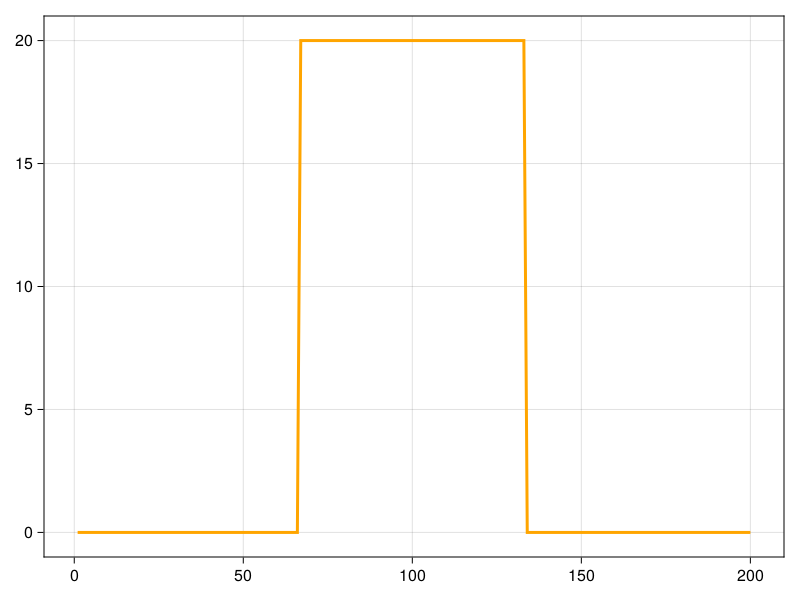

In [162]:
conc = zeros(200)
perfect_malt_conc!(conc,1,20.)

CairoMakie.lines(conc, title = "End fitness = " * string(round(malt_fitness(conc,1)[1],digits = 2)), color = :orange,label = "Gene C",linewidth = 3.)


In [163]:
# n_stripe = 2

# stripe_threshold = 5.

# min_width = 5.

# output_gene = 3

# # target = [20.,40.,140.]

# target = [(100.,20.)]

# fitness_function = s -> fitness_evaluation(s,x->f_sim(x,stripe_threshold,n_stripe,target,min_width),output_gene);

# target_pattern = conc2dist(create_target(target,200,20.))

# fitness_function = s -> fitness_evaluation(s,x->f_sim_cw(x,stripe_threshold,n_stripe,target,min_width),output_gene);

# fitness_function = s -> fitness_evaluation(s,x->f_sim_cw(x,stripe_threshold,n_stripe,target_pattern,min_width),output_gene);

# fitness_function = s -> fitness_evaluation(s,x->f_dist(x,target_pattern),output_gene);

# fitness_function = s -> fitness_evaluation(s,x->malt_fitness(x,2),output_gene);

# target_pattern = conc2dist(create_target(target,200,20.))

# fitness_function = s -> fitness_evaluation(s,x->f_mse(x,target_pattern),output_gene);

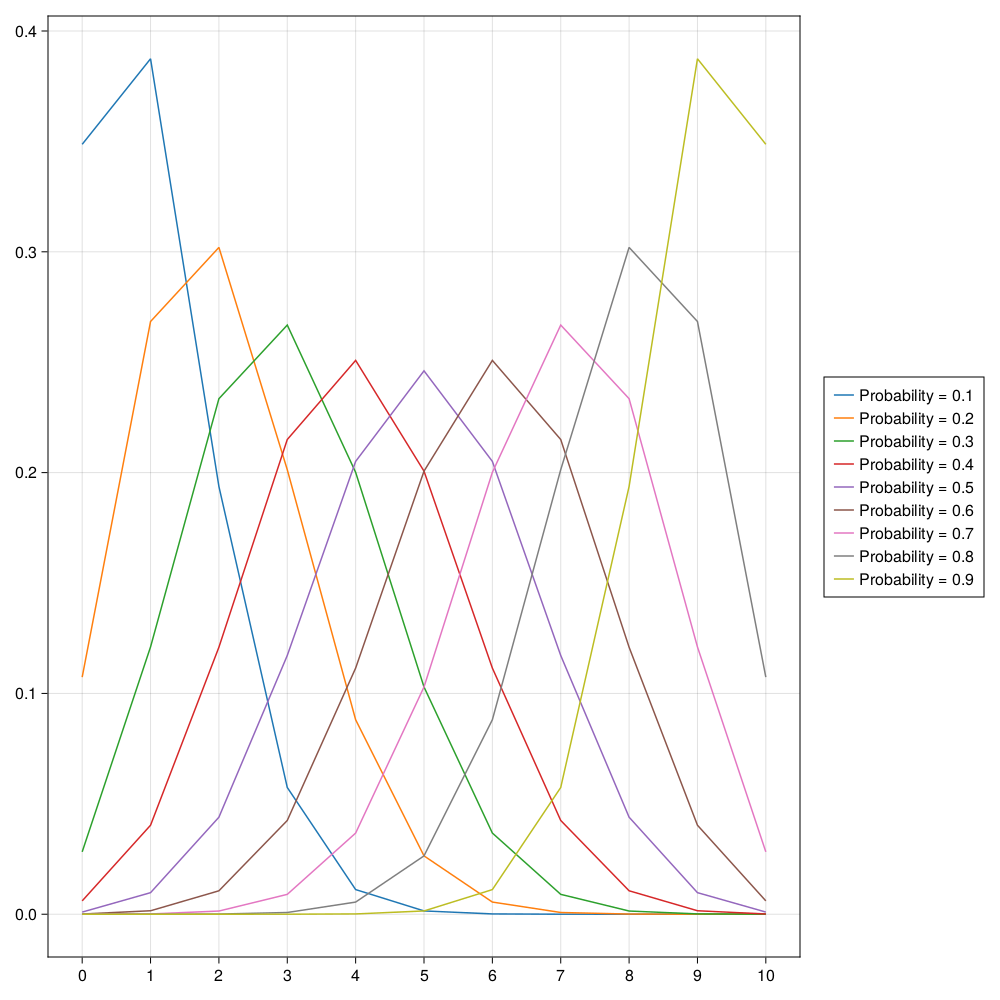

In [164]:
binomialp(k,p,n) = (factorial(n)/(factorial(k)*factorial(n-k)))*(p^k)*((1-p)^(n-k))

n_trials = 10

fig = CairoMakie.Figure(resolution = (1000,1000))

ax = Axis(fig[1,1],xticks = (1:n_trials+1,string.(0:n_trials)))

for (np,p) in enumerate(0.1:0.1:0.9)
    CairoMakie.lines!(ax,[binomialp(k,p,n_trials) for k in 0:n_trials],color = palette(:tab10)[np], label = "Probability = " * string(p))
end

leg = Legend(fig[1,2],ax)

fig

In [165]:
# start_network =  [0.0 -0.08094296793046485 -1.6342212814157109 0.13600252794569787; -1.6014368394070333 1.7480605584455964 -0.4584210244847852 0.0; -0.8169316554820437 -0.40651314937576466 1.1228625042976534 0.0] # classical stripe

# start_network = [0.0 0.0 0.0 0.118451136226118; 2.4875557984283927 0.006385592876007021 0.0 0.0; -0.6600723057807811 0.0034411427026081855 1.2521145758131953 0.0] # classical half

# start_network = [0.0 0.0 0.0 0.3067566654210594; 0.12029512645163867 0.0 0.0 0.0; 0.00016721042177030607 -0.08984895607472876 0.7414875625561165 0.0] # feed forward half

# start_network = [0.0 0.0 0.0 -0.28489525344373173; -23.34935576392901 0.0 -5.897287807895082 0.0; 0.0 -11.683082454871982 0.40911013866267465 0.0]  # bistable half

# start_network = [4.0458285254070265 0.1245433996893238 -0.019277079363331805 -0.5009631951037415; 0.0 0.22234050024502644 0.0 0.0; 0.5110844315711164 -1.8523252328743676 0.0 0.0] # frozen_osc half

# start_network = [0.0 0.0 0.0 0.4732655447483311; -0.002160601558532243 0.0 0.38111013618470424 0.0; 0.0 0.35106298380097334 0.0 0.0] # mutual_inh half

# start_network = [0.0 0.0 0.020427845284682486 -1.5026582888669309; 40.79677525181028 0.0 0.0 0.0; -47.7150488070664 0.4362626378520396 0.0 0.0] # overlap_dom half

# start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)).* rand(Ng,Ng+1) .* w_classical

# start_network =  [0.0 0.0 0.0 0.07540441792301926; 0.011902394691823354 0.0 0.0 0.0; 0.1556003708466779 -0.013413295468356505 0.16420178517104528 0.0]

# start_network = [0.0 0.0 0.0 -0.07004776094706804; 0.015105718393961626 0.0 0.0 0.0; 0.7137116741254721 -0.06816613580504306 0.1917206616077427 0.0] # feed foreward half < 1

# start_network = [0.0 0.0 0.0 0.19002370162025478; 0.0 0.32277636563140455 0.0 0.0; -0.49509655348612014 0.5460979076224355 0.9692696881064365 0.0] # classical half < 1

# start_network = [0.0 0.0 0.0 0.41062770366583284; -1.0 0.007593260264876046 0.0 0.0; -0.03145229949357482 0.03856541374699628 1.0 0.0] # classical half < 1

# topology = "overlap_dom"

# start_network = example_networks[topology]

start_network = (0.9995 .^ rand(0:10000,Ng,Ng+1)) .* rand(Ng,Ng+1) .* w_feed_forward

start_network =  [0.0 0.0 0.0 0.28368795845354794; 0.09693796878733349 0.0 0.0 0.0; 0.02660150950444218 -0.26272166357617865 0.6146272196396064 0.0] # right handed

start_network = [0.0 0.0 0.0 0.3219064710740815; 0.0007433918641741762 0.0 0.0 0.0; 0.1607444642281683 -1.0 0.025164093745334126 0.0] # left handed

viable_mutations = Int64.(start_network .!= 0)

viable_mutations = ones(Int64,Ng,Ng+1)
viable_mutations[2,4] = 0
viable_mutations[3,4] = 0

cv = 1.

mut_prob = 0.1

if isnothing(mut_prob)
    n_sample_func() = 1
else
    n_sample_func() = rand(Binomial(length(mutation_op.mutation_freq),mut_prob))
end

mutation_op = MutationOperator(Normal,(μ = 0.0,σ = cv),findall(viable_mutations .> 0))

# n_sample_func() = rand(Binomial(length(mutation_op.mutation_freq),0.5))

noise_params = (n_sample_func,0.05)

mutate_function = i -> noise(i,mutation_op,noise_params);

output_gene = 3

# fitness_function = s -> fitness_evaluation(s,x->malt_fitness(x,1),output_gene);

# fitness_function = s -> fitness_evaluation(s,x->malt_fitness(x,1),output_gene);

fitness_function = s -> fitness_evaluation(s,x->malt_fitness(x,1),output_gene);


In [166]:
# n_sample_func() = 1

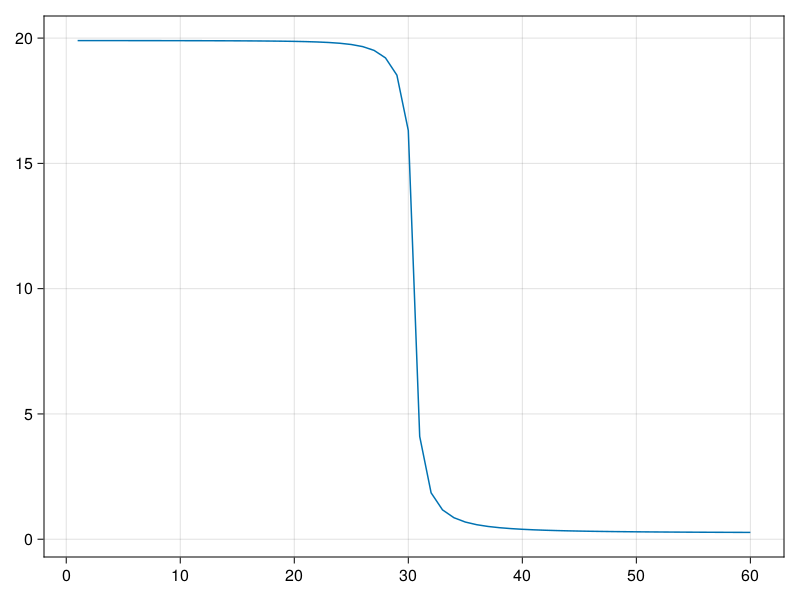

In [170]:
start_ind = Individual(start_network,grn_parameters,DefaultGRNSolver());

# plot_SS(start_ind.phenotype.u[end])

CairoMakie.lines(start_ind.phenotype.u[end][3,:])

Evolutionary setup:

In [171]:
# β = 0.0001

β = 1.

max_gen = 50000

tolerance = 0.9

# fm_id = (1,2)

# fm_gen = 0

# p_final, evo_trace, e  = SSWM_Evolution_error(start_network,grn_parameters,β,max_gen,tolerance,fitness_function,mutate_function);

p_final, evo_trace = SSWM_Evolution(start_network,grn_parameters,β,max_gen,tolerance,fitness_function,mutate_function);

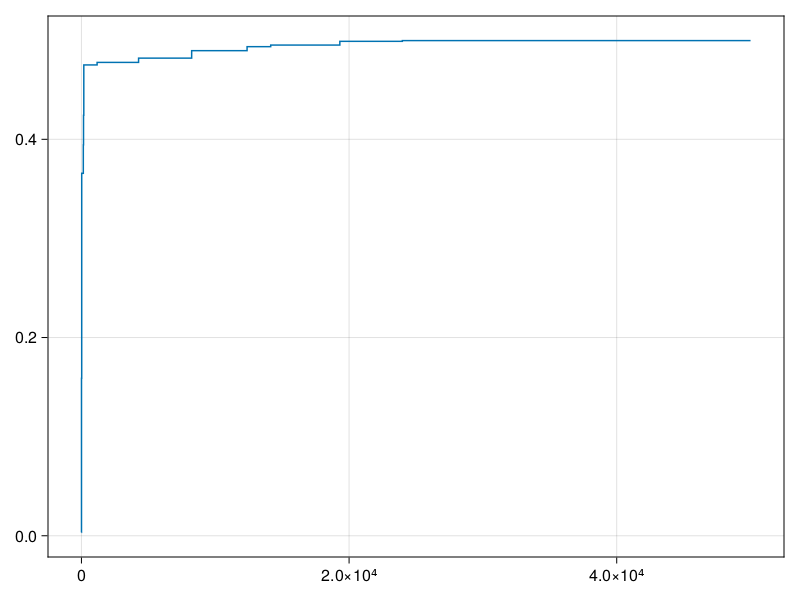

In [172]:
CairoMakie.lines(map(x->x[1],evo_trace.fitness_trajectory),label = nothing,ylabel = "Fitness",xlabel = "Generation")

Plot convergence of second fitness component (equalness):

In [173]:
# plot(map(x->x[2],evo_trace.fitness_trajectory))

Check out phenotype:

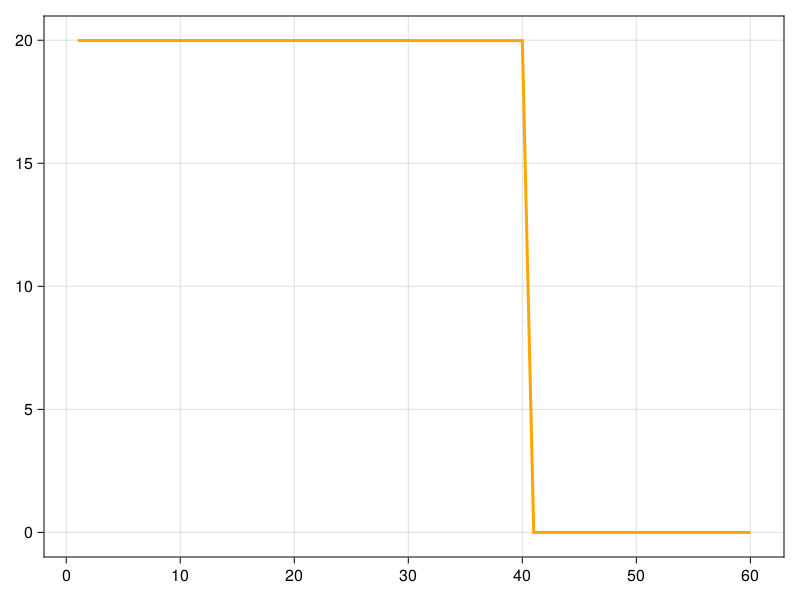

In [175]:
CairoMakie.lines(p_final.dominant_individual.phenotype.u[end][3,:],color = :orange,xlabel = "Tissue",ylabel = "Concentration",label = "Gene C", title = "End fitness = " * string(round(evo_trace.fitness_trajectory[end],digits = 4)),linewidth = 3.)

In [ ]:
p_final.dominant_individual.genotype.p[1]

In [ ]:
start_network

In [ ]:
a = []
push!(a,p_final.dominant_individual.genotype.p[1])

In [ ]:
evo_trace.fitness_trajectory[end]

In [ ]:
classical_half = []

In [ ]:
push!(classical_half,p_final.dominant_individual.genotype.p[1])

In [ ]:
# classical_half = []

exh = [0.0 0.0 0.0 0.118451136226118; 2.4875557984283927 0.006385592876007021 0.0 0.0; -0.6600723057807811 0.0034411427026081855 1.2521145758131953 0.0]

exs = [0.0 -0.08094296793046485 -1.6342212814157109 0.13600252794569787; -1.6014368394070333 1.7480605584455964 -0.4584210244847852 0.0; -0.8169316554820437 -0.40651314937576466 1.1228625042976534 0.0] 

In [ ]:
# new_networks = copy(example_networks)


In [ ]:
new_networks[topology] = p_final.dominant_individual.genotype.p[1]

In [ ]:
# safesave(datadir("exp_pro/c100_w60_networks/examples.jld"),new_networks)

In [ ]:
scatter(map(x->x[1],pheno_path_cw),map(x->x[2],pheno_path_cw))

In [ ]:
function get_centres_and_width(v)
    return v[1] + 0.5*v[2], v[2]
end

pheno_path_cw = reduce(vcat,evo_trace.traversed_phenotypes)

# plot(pheno_path_cw,seriestype = :path,xaxis = "centre position",yaxis = "width")
# scatter!(collect(keys(countmap(pheno_path_cw))),zcolor = Float64.(collect(values(countmap(pheno_path_cw)))) ./ length(pheno_path_cw))

p = plot(map(x->x[1],pheno_path_cw),map(x->x[2],pheno_path_cw))
scatter!(p,map(x->x[1],pheno_path_cw),map(x->x[2],pheno_path_cw))
p

In [ ]:
pheno_path_1 = map(x->x[3][1],evo_trace.fitness_trajectory)
pheno_path_2 = map(x->x[3][2],evo_trace.fitness_trajectory)
pheno_path_3 = map(x->x[3][3],evo_trace.fitness_trajectory)

plot(pheno_path_1,pheno_path_2,pheno_path_3,seriestype = :path, camera = (70,30))

# https://discourse.julialang.org/t/animation-from-data-points-arrays/40642/2
# do average then ribbon for error bars

In [ ]:
p_final.dominant_individual.genotype.p[1]

In [ ]:
count(x->x==:MaxIters,evo_trace.retcodes)/length(evo_trace.retcodes)

Run evolution for an extended period, using previous output as start population:

In [ ]:
max_gen = 100000

SSWM_Evolution!(p_final,evo_trace,β,max_gen,tolerance,fitness_function,mutate_function)

In [ ]:
p_final.fitness

In [ ]:
# frozen osc

# 2.45845  -2.18826  -0.654486  0.100882
#  0.0       0.33589   0.0       0.0
#  3.61625  -6.32603   0.0       0.0

# position 50, width = 20 frozen osc

# 2.46532  -2.18916   -0.482151  0.100882
# 0.0       0.336411   0.0       0.0
# 3.8587   -5.86916    0.0       0.0

# frozen 2 stripe

# 2.46532  -2.18916   -0.482151  0.22361
# 0.0       0.463721   0.0       0.0
# 3.85257  -6.03316    0.0       0.0

In [ ]:
findall(x-> x!= :Terminated,evo_trace.retcodes)

In [ ]:
length(evo_trace.retcodes)

In [ ]:
evo_trace.retcodes[736]

In [ ]:
# dider stripe
# 2.4617   -2.01504   -0.482151  0.0698463
# 0.0       0.428295   0.0       0.0
# 3.96334  -6.27255    0.0       0.0